<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/pv_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.8 MB/s 


In [2]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
df=pd.read_excel("/content/pv_02.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [5]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	18
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	15
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	14
Rejected: 	27
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	14
Rejected: 	27
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	14
Rejected: 	27
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	11
Rejec

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=129,
                                         random_state=RandomState(MT19937) at 0x7F6C25ADAA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F6C25ADAA40, verbose=2)

In [6]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [7]:
inputs1

<KerasTensor: shape=(None, 2, 17) dtype=float32 (created by layer 'input_1')>

In [9]:
from keras import optimizers

In [12]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/200
53/53 [==============================] - 11s 54ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2/200
53/53 [==============================] - 2s 29ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3/200
53/53 [==============================] - 2s 29ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 5/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 6/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 7/200
53/53 [==============================] - 1s 24ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 8/200
53/53 [==============================] - 1s 23ms/step - loss: 0

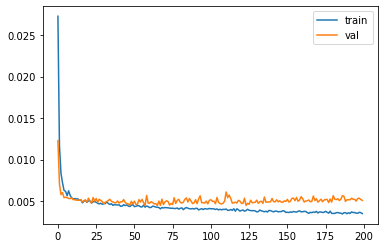

65/65 [==============================] - 1s 4ms/step


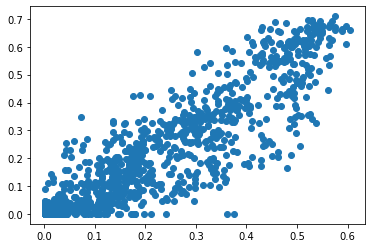

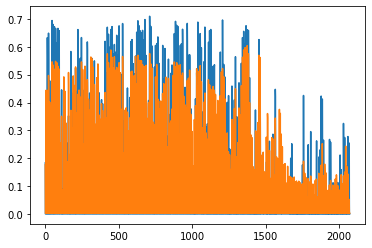

0.067299216350346


In [18]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
53/53 [==============================] - 10s 41ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 2/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 3/200
53/53 [==============================] - 1s 22ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4/200
53/53 [==============================] - 1s 22ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 5/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 6/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 7/200
53/53 [==============================] - 1s 22ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 8/200
53/53 [==============================] - 1s 22ms/step - loss: 0

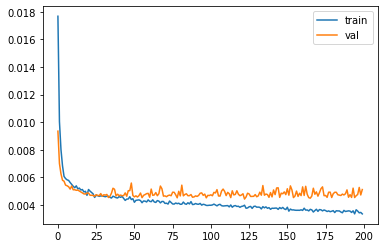

65/65 [==============================] - 1s 4ms/step


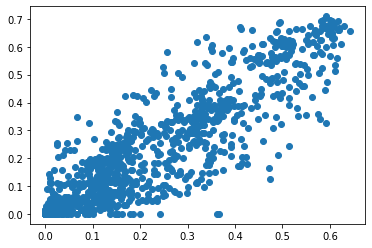

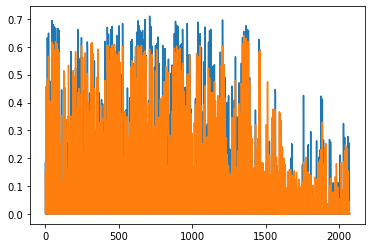

0.06687611332243784


In [19]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

In [20]:
from keras.layers import Bidirectional

Epoch 1/75
53/53 [==============================] - 23s 94ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2/75
53/53 [==============================] - 3s 49ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3/75
53/53 [==============================] - 3s 49ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4/75
53/53 [==============================] - 3s 49ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 6/75
53/53 [==============================] - 3s 49ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 7/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 8/75
53/53 [==============================] - 3s 49ms/step - loss: 0.0051 - 

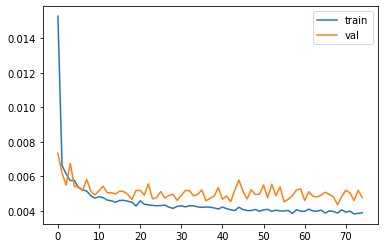

65/65 [==============================] - 2s 9ms/step


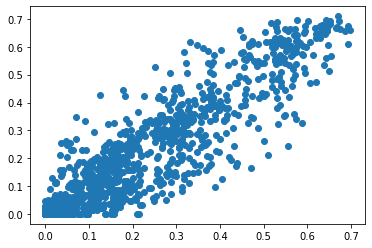

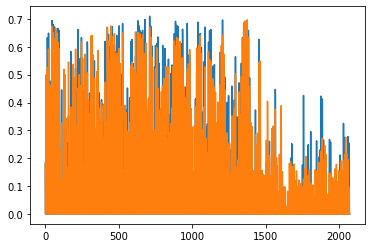

0.0621535366960428


In [21]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/75
53/53 [==============================] - 22s 88ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 2/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 4/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 5/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 6/75
53/53 [==============================] - 2s 47ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 7/75
53/53 [==============================] - 3s 48ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 8/75
53/53 [==============================] - 3s 49ms/step - loss: 0.0052 - 

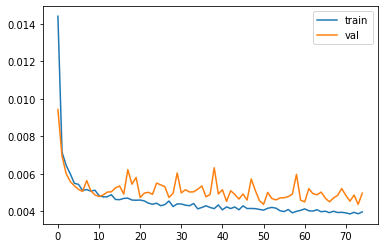

65/65 [==============================] - 2s 7ms/step


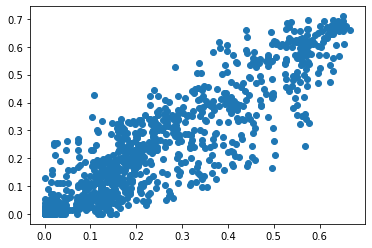

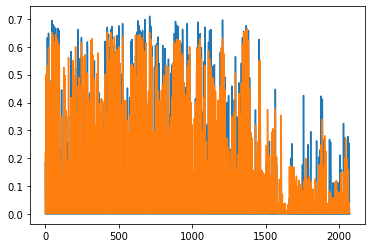

0.061764028360803296


In [22]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))